In [1]:
#LETS WORK WITH CIFAR 10 DATA 

# OBJECTIVE 

Train CIFAR 10 with RESNET using Augmentation technique :Albumentation,GRADCAM ,CUTOUT 

->Pick your last code

->Make sure  to Add CutOut to your code. It should come from your transformations (albumentations)

->Use this repo: https://github.com/davidtvs/pytorch-lr-finder
Move LR Finder code to your modules

->Implement LR Finder (for SGD, not for ADAM)
Implement ReduceLROnPlatea: https://pytorch.org/docs/stable/optim.html#torch.optim.lr_scheduler.ReduceLROnPlateau

->Find best LR to train your model

->Use SDG with Momentum

->Train for 50 Epochs. 

->Show Training and Test Accuracy curves

->Target 88% Accuracy.

->Run GradCAM on the any 25 misclassified images. Make sure you mention what is the prediction and what was the ground truth label.
 

In [2]:
#STEP1:Install Albumentation

In [3]:
!pip install -U albumentations

Requirement already up-to-date: albumentations in /usr/local/lib/python3.7/dist-packages (0.5.2)


In [4]:
#STEP 2 :Import in built library 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import torchvision
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor




In [5]:
#STEP 3 : DELETE OLD GIT FOLDER AND CLONE NEW ONE 
%rm -r /content/SWAG_DNN
!git clone https://github.com/jitendramishra1024/SWAG_DNN.git
%cd SWAG_DNN

Cloning into 'SWAG_DNN'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 127 (delta 70), reused 87 (delta 35), pack-reused 0
Receiving objects: 100% (127/127), 214.29 KiB | 14.29 MiB/s, done.
Resolving deltas: 100% (70/70), done.
/content/SWAG_DNN


In [6]:
#STEP 4 :import userdefined library

from SWAG_DNN.utils import Dataloader 
from SWAG_DNN.utils import show_images
from SWAG_DNN.utils import classcount
from SWAG_DNN.utils import perClassResult
from SWAG_DNN.utils import plot_misclassified_image
from SWAG_DNN.utils import useful_utils
from SWAG_DNN.utils import gradcam
from SWAG_DNN.utils import Albumentations
from SWAG_DNN.models import BasicModel
from SWAG_DNN.models import RESNET
from SWAG_DNN.trainer import train
from SWAG_DNN.trainer import test
from SWAG_DNN.utils.lr_finder import LRFinder

In [7]:
#STEP :5 Define parameters 

class Args:

    # Data Loading
    # ============

    # train_batch_size = 64
    # val_batch_size = 64
    num_workers = 4
    batch_size = 128


    # Regularization
    # ==============
    dropout = 0
    lambda_l2=5e-4
    lambda_l1=0

    # Training
    # ========
    random_seed = 1
    epochs = 30
    learning_rate = 0.01
    momentum = 0.9
    step_size=12


In [8]:
#get mean and standard deviation of images 

trainset = torchvision.datasets.CIFAR10(root='./data',download=True,transform=transforms.ToTensor())
mean,std = Dataloader.calculate_mean_std(trainset)

# mean =[0.5,0.5,0.5]
# std =[0.5,0.5,0.5]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [9]:
train_transform_album = Albumentations.album_compose_train(mean,std)
test_transform_album = Albumentations.album_compose_test(mean,std)

trainloader,testloader=Dataloader.train_test_loader_with_Albumentation(Args.batch_size,Args.num_workers,train_transform_album,test_transform_album)
classes = Dataloader.get_classes()

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

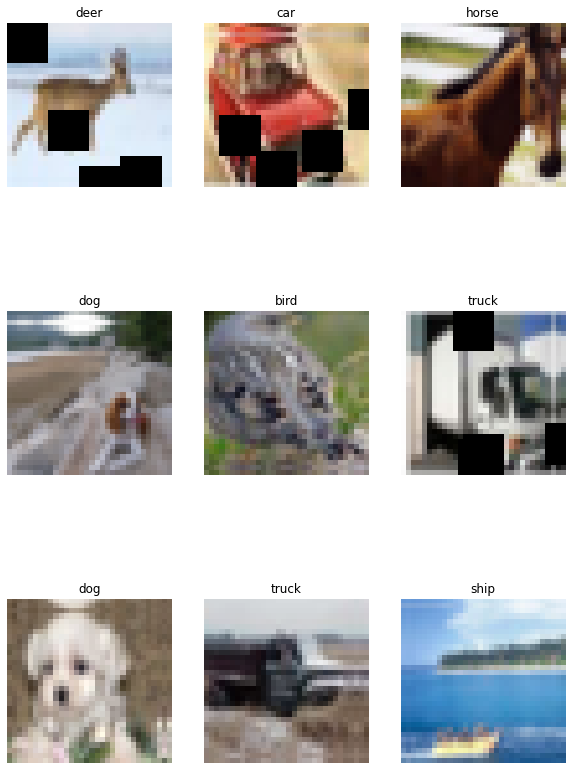

In [10]:
#plot  n raw images 
#make sure n is a squared number 
show_images.plot_n_image(9,trainloader,classes,mean,std,format='raw')


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

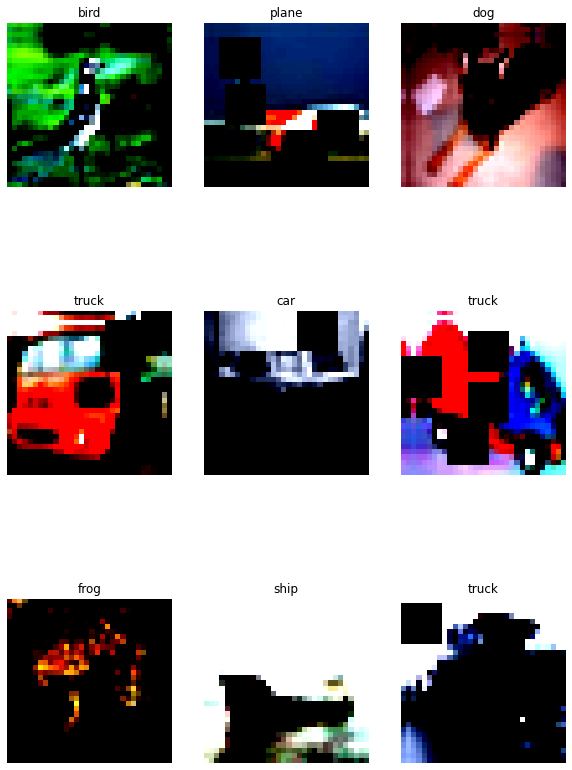

In [11]:
#plot  n normalized images 
#make sure n is a squared number 
show_images.plot_n_image(9,trainloader,classes,mean,std,format='normalized')

In [12]:

dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
class_count = classcount.get_train_class_count(dataset,classes)
print(class_count)

Files already downloaded and verified
{'frog': 5000, 'truck': 5000, 'deer': 5000, 'car': 5000, 'bird': 5000, 'horse': 5000, 'ship': 5000, 'cat': 5000, 'dog': 5000, 'plane': 5000}


In [13]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

#working 
#model = BasicModel.Net().to(device)


model = RESNET.ResNet18().to(device) 
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [14]:
#FIND BEST POSSIBLE LR 


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.92E-02


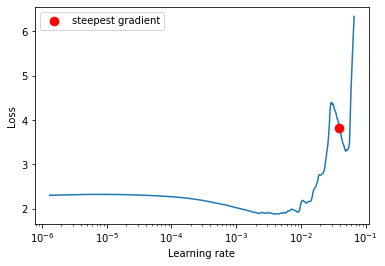

In [15]:
import torch.nn as nn
import torch.optim as optim
min_lr=1e-06
# criterion = nn.CrossEntropyLoss()
# optimiser = optim.SGD(model.parameters(), lr=min_lr,momentum=Args.momentum,weight_decay=Args.lambda_l2 )
# lr_finder = LRFinder(model, optimiser, criterion, device="cuda")
# lr_finder.range_test(trainloader, val_loader=testloader, end_lr=1, num_iter=100 ,step_mode="exp")

import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(model.parameters(), lr=min_lr,momentum=Args.momentum,weight_decay=Args.lambda_l2 )
lr_finder = LRFinder(model, optimiser, criterion, device="cuda")
lr_finder.range_test(trainloader, val_loader=testloader, end_lr=1, num_iter=500 ,step_mode="exp")

# #            start_lr (float, optional): the starting learning rate for the range test.
#                 Default: None (uses the learning rate from the optimizer).
#             end_lr (float, optional): the maximum learning rate to test. Default: 10.
#             num_iter (int, optional): the number of iterations over which the test
#                 occurs. Default: 100.

## PLOT 

lr_finder.plot()

## Extract Best LR with minimum losss 

Best_lr = lr_finder.history['lr'][lr_finder.history['loss'].index(lr_finder.best_loss)]

In [16]:
lr_finder.reset() # to reset the model and optimizer to their initial state

In [17]:
#initialize loss , scheduler , optimizer 


In [18]:
## **Initialise Loss funtion, Optimizer, Schedular**
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=Best_lr,momentum=0.9 ,weight_decay = 0.0001)
scheduler = ReduceLROnPlateau(optimizer, patience = 3)

In [19]:

# import torch.optim as optim
# from torch.optim.lr_scheduler import StepLR
# lossfunc = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=Args.learning_rate, momentum=Args.momentum,weight_decay=Args.lambda_l2)
# scheduler = StepLR(optimizer, step_size=Args.step_size, gamma=0.1)


In [20]:
#Test
EPOCHS = Args.epochs

EPOCHS = 50
trainer = train.Trainer()
tester  = test.Tester()
lossfunc=criterion

for epoch in range(EPOCHS):
  print("EPOCH:", epoch+1, 'LR:',optimizer.param_groups[0]['lr'])
  trainer.train(model, device, trainloader, optimizer, lossfunc, epoch, Args.lambda_l1)
  #scheduler.step()
  tester.test(model, device, testloader)

test_losses,test_acc=tester.getValuesTest()
train_losses,train_acc=trainer.getValuesTrain()

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1 LR: 0.004521792417370704


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Train set: Loss=1.2013851404190063 Batch_id=390 Accuracy=46.17: 100%|██████████| 391/391 [01:05<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -3.8499, Test Accuracy: 5812/10000 (58.12%)

EPOCH: 2 LR: 0.004521792417370704


Train set: Loss=0.8516286015510559 Batch_id=390 Accuracy=63.23: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.9089, Test Accuracy: 6823/10000 (68.23%)

EPOCH: 3 LR: 0.004521792417370704


Train set: Loss=0.6178936958312988 Batch_id=390 Accuracy=71.06: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -5.9674, Test Accuracy: 7548/10000 (75.48%)

EPOCH: 4 LR: 0.004521792417370704


Train set: Loss=0.5879230499267578 Batch_id=390 Accuracy=75.25: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.6773, Test Accuracy: 7858/10000 (78.58%)

EPOCH: 5 LR: 0.004521792417370704


Train set: Loss=0.42404231429100037 Batch_id=390 Accuracy=78.33: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.2903, Test Accuracy: 7865/10000 (78.65%)

EPOCH: 6 LR: 0.004521792417370704


Train set: Loss=0.5722111463546753 Batch_id=390 Accuracy=80.52: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.6146, Test Accuracy: 8155/10000 (81.55%)

EPOCH: 7 LR: 0.004521792417370704


Train set: Loss=0.39993566274642944 Batch_id=390 Accuracy=82.26: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.7849, Test Accuracy: 8316/10000 (83.16%)

EPOCH: 8 LR: 0.004521792417370704


Train set: Loss=0.509398877620697 Batch_id=390 Accuracy=83.80: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.6771, Test Accuracy: 8338/10000 (83.38%)

EPOCH: 9 LR: 0.004521792417370704


Train set: Loss=0.5952573418617249 Batch_id=390 Accuracy=84.76: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.0362, Test Accuracy: 8414/10000 (84.14%)

EPOCH: 10 LR: 0.004521792417370704


Train set: Loss=0.42089420557022095 Batch_id=390 Accuracy=86.06: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.9621, Test Accuracy: 8460/10000 (84.60%)

EPOCH: 11 LR: 0.004521792417370704


Train set: Loss=0.28738918900489807 Batch_id=390 Accuracy=86.97: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.2990, Test Accuracy: 8445/10000 (84.45%)

EPOCH: 12 LR: 0.004521792417370704


Train set: Loss=0.47304654121398926 Batch_id=390 Accuracy=87.89: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.7644, Test Accuracy: 8538/10000 (85.38%)

EPOCH: 13 LR: 0.004521792417370704


Train set: Loss=0.45852771401405334 Batch_id=390 Accuracy=88.35: 100%|██████████| 391/391 [01:05<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.8286, Test Accuracy: 8329/10000 (83.29%)

EPOCH: 14 LR: 0.004521792417370704


Train set: Loss=0.2029666006565094 Batch_id=390 Accuracy=88.86: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.5967, Test Accuracy: 8545/10000 (85.45%)

EPOCH: 15 LR: 0.004521792417370704


Train set: Loss=0.21309712529182434 Batch_id=390 Accuracy=89.52: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.6316, Test Accuracy: 8798/10000 (87.98%)

EPOCH: 16 LR: 0.004521792417370704


Train set: Loss=0.32437288761138916 Batch_id=390 Accuracy=89.90: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.3867, Test Accuracy: 8670/10000 (86.70%)

EPOCH: 17 LR: 0.004521792417370704


Train set: Loss=0.30057844519615173 Batch_id=390 Accuracy=90.55: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.7978, Test Accuracy: 8816/10000 (88.16%)

EPOCH: 18 LR: 0.004521792417370704


Train set: Loss=0.34622180461883545 Batch_id=390 Accuracy=91.03: 100%|██████████| 391/391 [01:05<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.1785, Test Accuracy: 8719/10000 (87.19%)

EPOCH: 19 LR: 0.004521792417370704


Train set: Loss=0.3223899304866791 Batch_id=390 Accuracy=91.46: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.1819, Test Accuracy: 8831/10000 (88.31%)

EPOCH: 20 LR: 0.004521792417370704


Train set: Loss=0.2002585232257843 Batch_id=390 Accuracy=91.97: 100%|██████████| 391/391 [01:05<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -11.6324, Test Accuracy: 8828/10000 (88.28%)

EPOCH: 21 LR: 0.004521792417370704


Train set: Loss=0.20586752891540527 Batch_id=390 Accuracy=92.35: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.5074, Test Accuracy: 8817/10000 (88.17%)

EPOCH: 22 LR: 0.004521792417370704


Train set: Loss=0.3202650249004364 Batch_id=390 Accuracy=92.62: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.5446, Test Accuracy: 8901/10000 (89.01%)

EPOCH: 23 LR: 0.004521792417370704


Train set: Loss=0.14042431116104126 Batch_id=390 Accuracy=93.07: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.4495, Test Accuracy: 8930/10000 (89.30%)

EPOCH: 24 LR: 0.004521792417370704


Train set: Loss=0.18630561232566833 Batch_id=390 Accuracy=93.38: 100%|██████████| 391/391 [01:05<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.9860, Test Accuracy: 8816/10000 (88.16%)

EPOCH: 25 LR: 0.004521792417370704


Train set: Loss=0.2814539074897766 Batch_id=390 Accuracy=93.52: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -12.8427, Test Accuracy: 8830/10000 (88.30%)

EPOCH: 26 LR: 0.004521792417370704


Train set: Loss=0.06769950687885284 Batch_id=390 Accuracy=93.85: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -13.0278, Test Accuracy: 8940/10000 (89.40%)

EPOCH: 27 LR: 0.004521792417370704


Train set: Loss=0.14189627766609192 Batch_id=390 Accuracy=93.85: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -13.4534, Test Accuracy: 8932/10000 (89.32%)

EPOCH: 28 LR: 0.004521792417370704


Train set: Loss=0.22106961905956268 Batch_id=390 Accuracy=94.04: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -13.3411, Test Accuracy: 8977/10000 (89.77%)

EPOCH: 29 LR: 0.004521792417370704


Train set: Loss=0.15757915377616882 Batch_id=390 Accuracy=94.70: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -14.1850, Test Accuracy: 8985/10000 (89.85%)

EPOCH: 30 LR: 0.004521792417370704


Train set: Loss=0.20410986244678497 Batch_id=390 Accuracy=94.63: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -14.0057, Test Accuracy: 8962/10000 (89.62%)

EPOCH: 31 LR: 0.004521792417370704


Train set: Loss=0.1987016499042511 Batch_id=390 Accuracy=95.05: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -13.9554, Test Accuracy: 9020/10000 (90.20%)

EPOCH: 32 LR: 0.004521792417370704


Train set: Loss=0.1833151876926422 Batch_id=390 Accuracy=95.11: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -14.4046, Test Accuracy: 8994/10000 (89.94%)

EPOCH: 33 LR: 0.004521792417370704


Train set: Loss=0.2503756582736969 Batch_id=390 Accuracy=95.16: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -14.1779, Test Accuracy: 9049/10000 (90.49%)

EPOCH: 34 LR: 0.004521792417370704


Train set: Loss=0.15092520415782928 Batch_id=390 Accuracy=95.42: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -14.0483, Test Accuracy: 8966/10000 (89.66%)

EPOCH: 35 LR: 0.004521792417370704


Train set: Loss=0.12484104931354523 Batch_id=390 Accuracy=95.64: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -14.5629, Test Accuracy: 8966/10000 (89.66%)

EPOCH: 36 LR: 0.004521792417370704


Train set: Loss=0.15443000197410583 Batch_id=390 Accuracy=95.93: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -14.7594, Test Accuracy: 9018/10000 (90.18%)

EPOCH: 37 LR: 0.004521792417370704


Train set: Loss=0.11137374490499496 Batch_id=390 Accuracy=96.02: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -15.1938, Test Accuracy: 9009/10000 (90.09%)

EPOCH: 38 LR: 0.004521792417370704


Train set: Loss=0.1554308831691742 Batch_id=390 Accuracy=96.03: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -15.1294, Test Accuracy: 9087/10000 (90.87%)

EPOCH: 39 LR: 0.004521792417370704


Train set: Loss=0.1649726927280426 Batch_id=390 Accuracy=96.25: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -15.5705, Test Accuracy: 9105/10000 (91.05%)

EPOCH: 40 LR: 0.004521792417370704


Train set: Loss=0.16243582963943481 Batch_id=390 Accuracy=96.15: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -15.2190, Test Accuracy: 8965/10000 (89.65%)

EPOCH: 41 LR: 0.004521792417370704


Train set: Loss=0.14807334542274475 Batch_id=390 Accuracy=96.18: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -15.0879, Test Accuracy: 9075/10000 (90.75%)

EPOCH: 42 LR: 0.004521792417370704


Train set: Loss=0.13858668506145477 Batch_id=390 Accuracy=96.47: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -15.4147, Test Accuracy: 9094/10000 (90.94%)

EPOCH: 43 LR: 0.004521792417370704


Train set: Loss=0.09886466711759567 Batch_id=390 Accuracy=96.72: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -15.6009, Test Accuracy: 9060/10000 (90.60%)

EPOCH: 44 LR: 0.004521792417370704


Train set: Loss=0.08712048083543777 Batch_id=390 Accuracy=96.55: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -15.5893, Test Accuracy: 9093/10000 (90.93%)

EPOCH: 45 LR: 0.004521792417370704


Train set: Loss=0.08773988485336304 Batch_id=390 Accuracy=96.62: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -15.9567, Test Accuracy: 9043/10000 (90.43%)

EPOCH: 46 LR: 0.004521792417370704


Train set: Loss=0.1266370713710785 Batch_id=390 Accuracy=96.97: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -16.0327, Test Accuracy: 9094/10000 (90.94%)

EPOCH: 47 LR: 0.004521792417370704


Train set: Loss=0.1083487868309021 Batch_id=390 Accuracy=96.79: 100%|██████████| 391/391 [01:06<00:00,  5.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -16.0275, Test Accuracy: 9096/10000 (90.96%)

EPOCH: 48 LR: 0.004521792417370704


Train set: Loss=0.11174359172582626 Batch_id=390 Accuracy=97.11: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -16.2551, Test Accuracy: 9088/10000 (90.88%)

EPOCH: 49 LR: 0.004521792417370704


Train set: Loss=0.0723467618227005 Batch_id=390 Accuracy=97.10: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -15.9583, Test Accuracy: 9084/10000 (90.84%)

EPOCH: 50 LR: 0.004521792417370704


Train set: Loss=0.023933855816721916 Batch_id=390 Accuracy=97.12: 100%|██████████| 391/391 [01:06<00:00,  5.92it/s]



Test set: Average loss: -16.1385, Test Accuracy: 9128/10000 (91.28%)



In [21]:
new_train_acc,new_train_loss=useful_utils.modify_train_loss_accuracy_from_batch_level_to_epoch_level(train_acc,train_losses,trainloader)

train_acc_mod=new_train_acc
train_losses_mod=new_train_loss
len(train_acc_mod),len(train_losses_mod),len(new_train_loss)

(50, 50, 50)

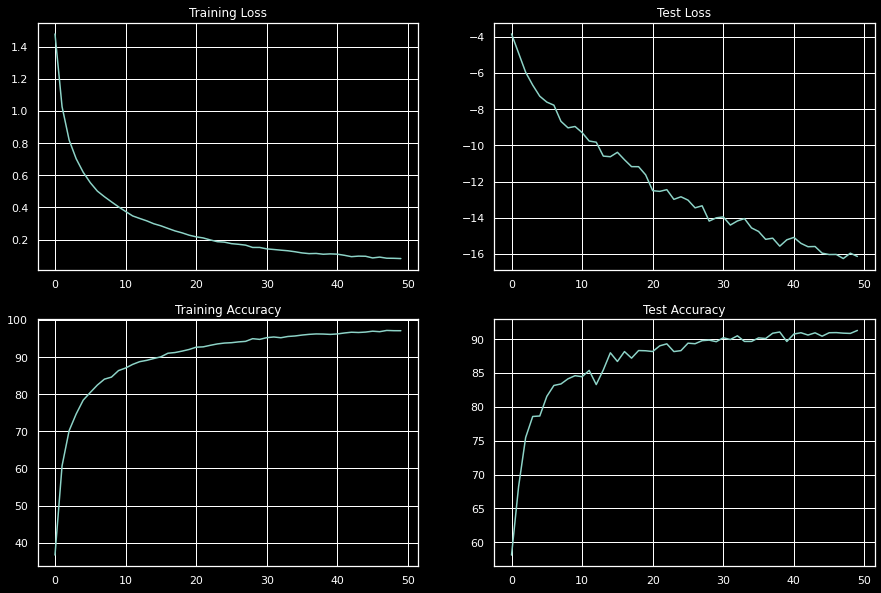

In [22]:
def plot_train_test_loss_accuracy(train_losses_mod,train_acc_mod,test_losses,test_acc):
  import seaborn as sns
  import matplotlib.pyplot as plt
  sns.set()
  plt.style.use("dark_background")

  fig, axs = plt.subplots(2,2,figsize=(15,10))
  axs[0, 0].plot(train_losses_mod)
  axs[0, 0].set_title("Training Loss")
  axs[1, 0].plot(train_acc_mod)
  axs[1, 0].set_title("Training Accuracy")
  axs[0, 1].plot(test_losses)
  axs[0, 1].set_title("Test Loss")
  axs[1, 1].plot(test_acc)
  axs[1, 1].set_title("Test Accuracy")
  plt.show()

plot_train_test_loss_accuracy(train_losses_mod,train_acc_mod,test_losses,test_acc)

In [23]:

torch.save(model,'./data/cifar')


In [24]:
#load the model
model = torch.load('./data/cifar')
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [25]:
#GET PERCENTAGE ACCURACY FOR EACH CLASS      
perClassResult.get_percent_acc_each_class(model,device,classes,testloader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Accuracy of plane : 100 %
Accuracy of   car : 93 %
Accuracy of  bird : 90 %
Accuracy of   cat : 77 %
Accuracy of  deer : 94 %
Accuracy of   dog : 93 %
Accuracy of  frog : 92 %
Accuracy of horse : 85 %
Accuracy of  ship : 88 %
Accuracy of truck : 83 %


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

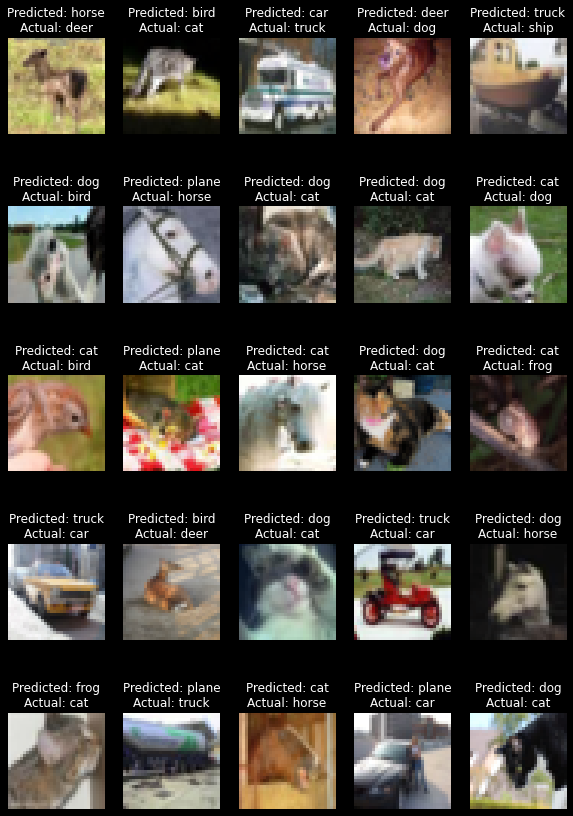

In [26]:
#Plot misclassified Image
plot_misclassified_image.plot_misclassified(25, testloader, device,model,classes,mean,std,format='raw')

In [27]:
## GRAD CAM 


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3328: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


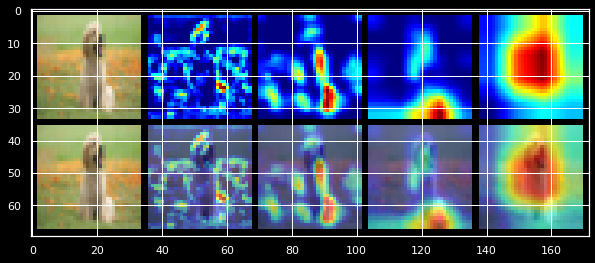

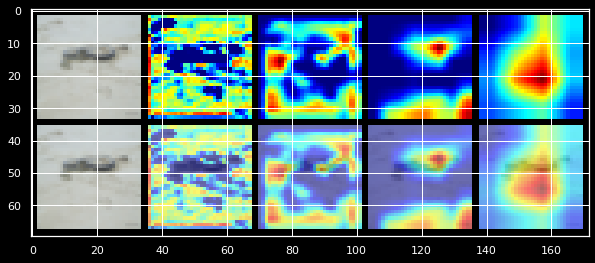

In [28]:
#GRAD CAM for user defined images
path='/content/SWAG_DNN/img'
import PIL
img_name =[path+'/dog.jpg',path+'/snake.jpg']
gradcam.grad_cam_for_user_defined_images(img_name,device,mean,std,model)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3328: UserWarning: nn.functional.upsample is depr

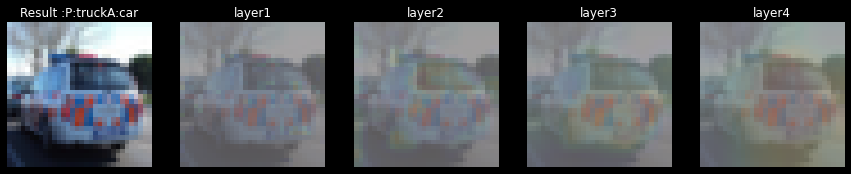

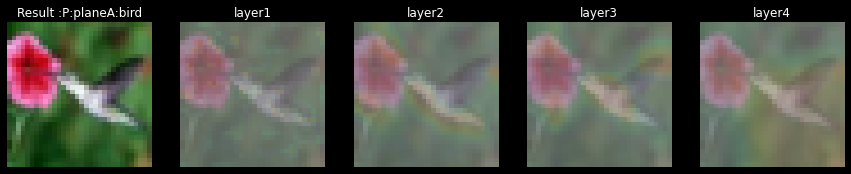

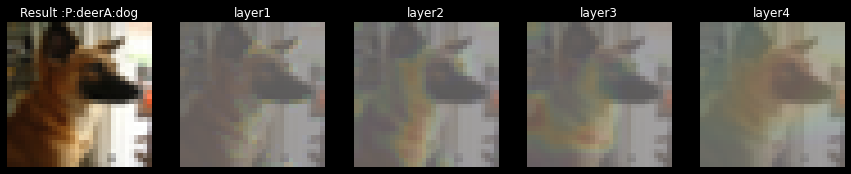

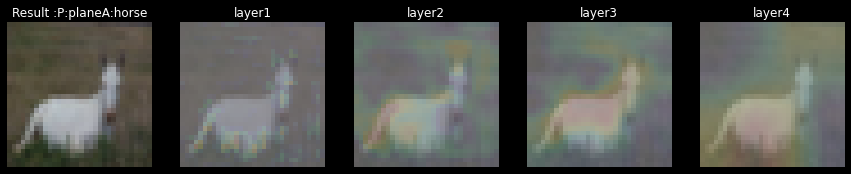

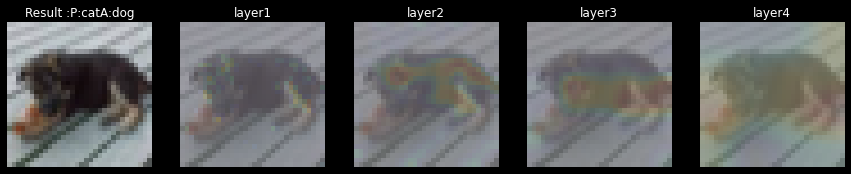

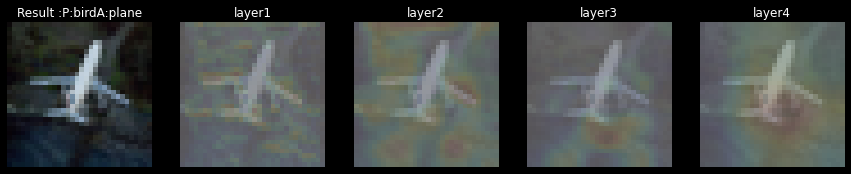

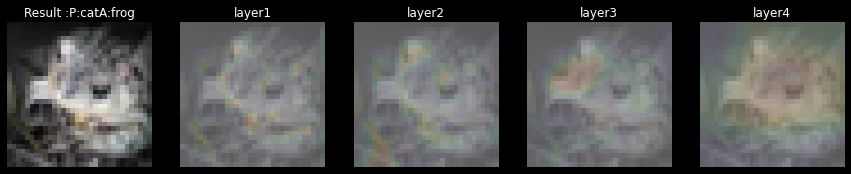

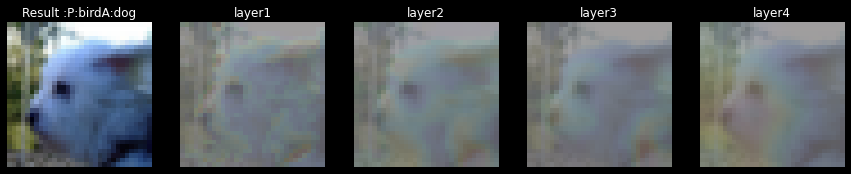

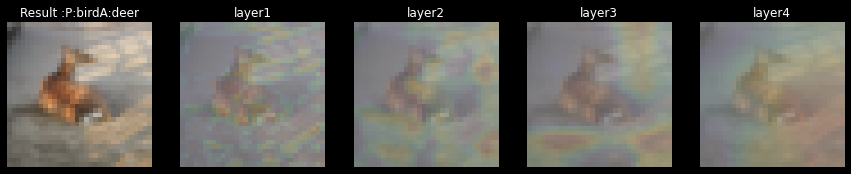

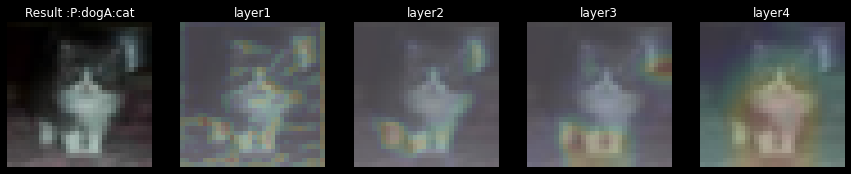

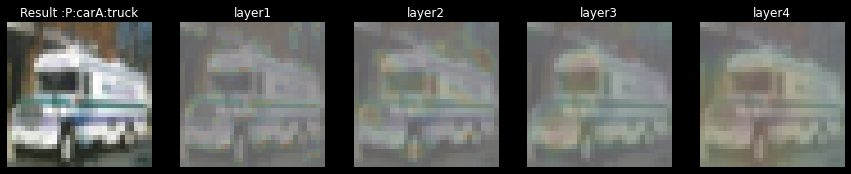

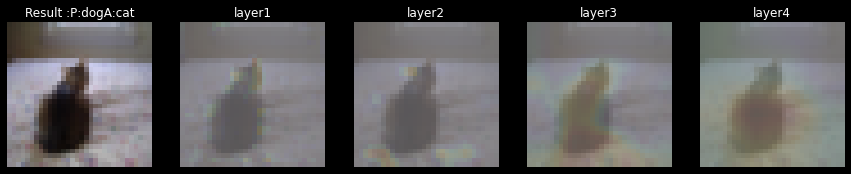

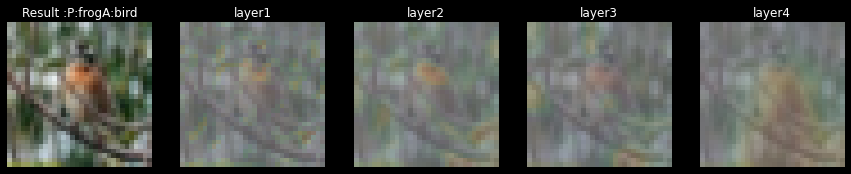

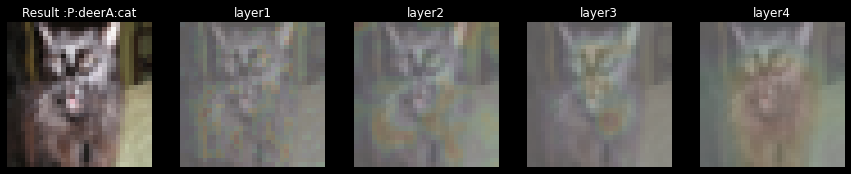

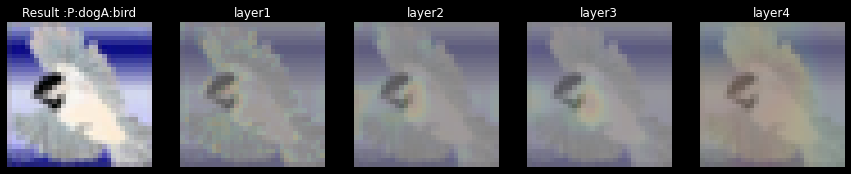

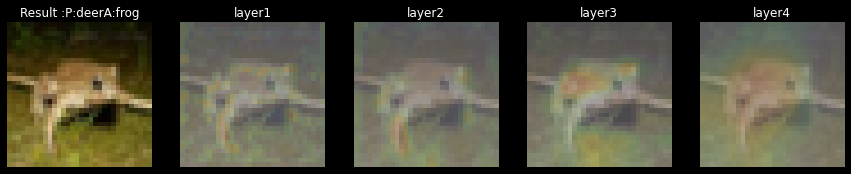

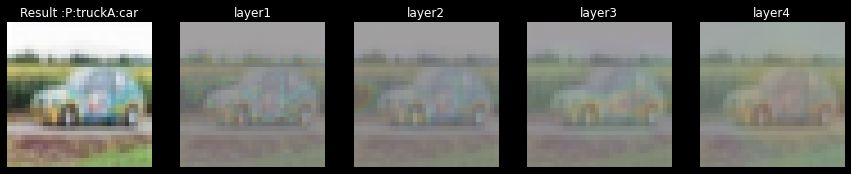

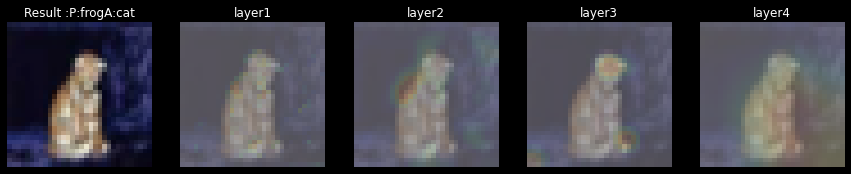

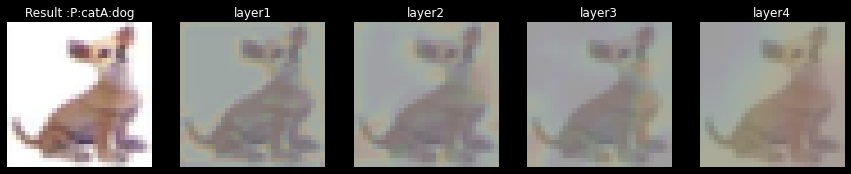

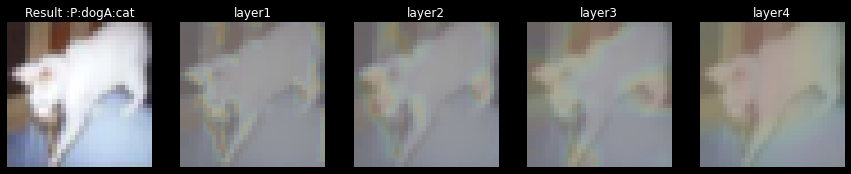

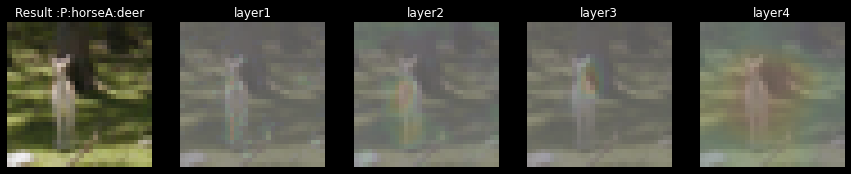

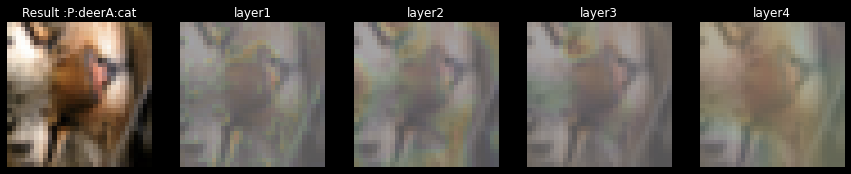

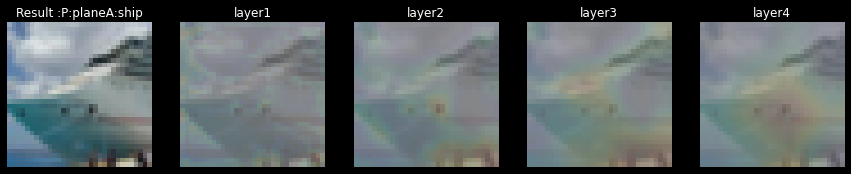

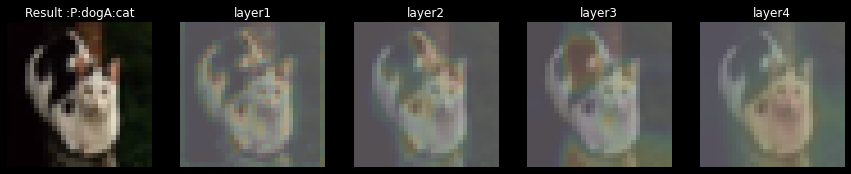

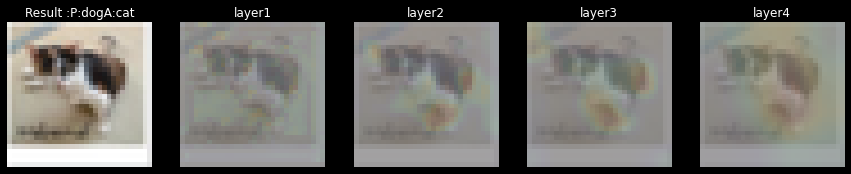

In [29]:
missed_images, predicted, actual = plot_misclassified_image.get_misclassified(model,testloader,device)

#lets see gradcam of  4 misclassified images 
gradcam.show_gradcam_for_n_images_only_result(25,missed_images,predicted,actual,classes,model,device,mean,std)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3328: UserWarning: nn.functional.upsample is depr

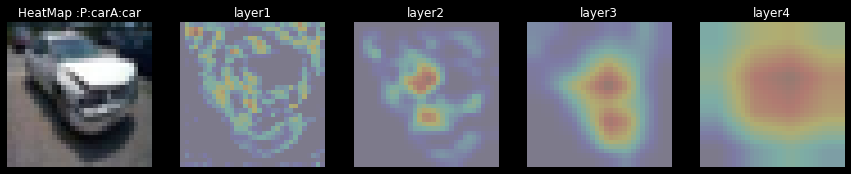

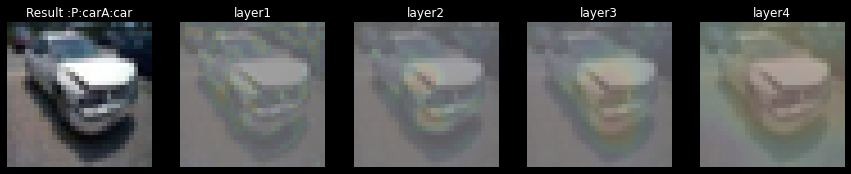

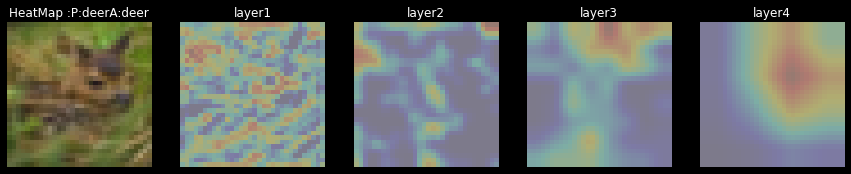

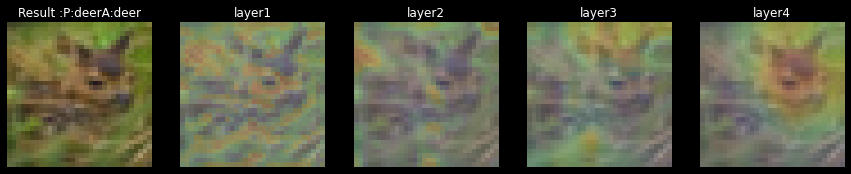

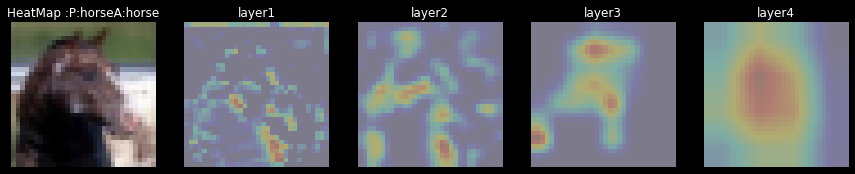

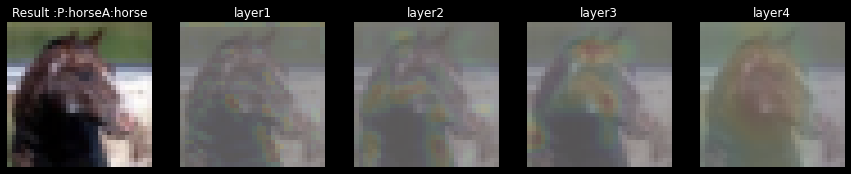

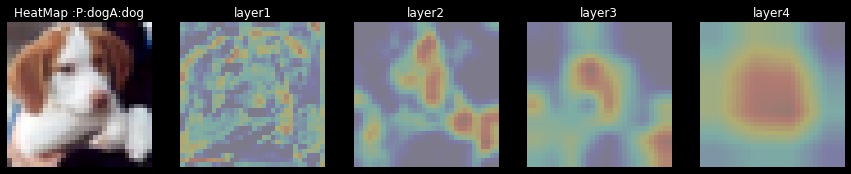

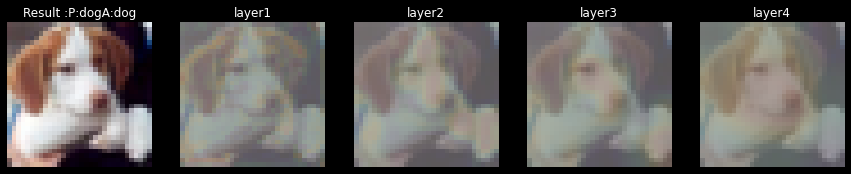

In [30]:
proper_images, predicted, actual = plot_misclassified_image.get_properclassified(model,testloader,device)

#lets see gradcam of  4 misclassified images 
gradcam.show_gradcam_for_n_images(4,proper_images,predicted,actual,classes,model,device,mean,std)